Project Title: Predicting Customer Churn in a Telecommunications Company

Storyline:
You’ve been hired as a data scientist at a major telecommunications company. The company has been experiencing a significant increase in customer churn, leading to revenue loss and decreased customer satisfaction. Your task is to develop a machine learning model that can predict which customers are likely to churn, allowing the company to take proactive measures to retain them.

Steps to Follow:

	1.	Dataset Creation:
To create a realistic dataset, you’ll need to simulate various customer attributes such as:
	•	Demographic information (age, gender, location)
	•	Service usage (number of calls, duration of calls, data usage)
	•	Billing information (monthly charges, total charges)
	•	Customer tenure (length of time with the company)
	•	Customer churn status (whether the customer has churned or not)
	2.	Data Preprocessing:
Clean the dataset by handling missing values, removing outliers, and encoding categorical variables.
	3.	Exploratory Data Analysis (EDA):
Explore the dataset to gain insights into customer behavior and identify trends that may be correlated with churn. Visualize the data using plots and charts.
	4.	Feature Engineering:
Create new features or transform existing ones to improve the performance of the model. For example, you could calculate the average monthly usage or create binary indicators for certain services.
	5.	Model Selection:
Choose appropriate classification algorithms such as logistic regression, decision trees, random forests, or gradient boosting. Evaluate each model’s performance using cross-validation and choose the one with the best performance metrics.
	6.	Model Training:
Split the dataset into training and testing sets. Train the selected model on the training set using the chosen algorithm.
	7.	Model Evaluation:
Evaluate the trained model on the testing set using performance metrics such as accuracy, precision, recall, and F1-score. Additionally, plot a confusion matrix to visualize the model’s performance.
	8.	Hyperparameter Tuning:
Fine-tune the hyperparameters of the selected model to further improve its performance. This can be done using techniques like grid search or random search.
	9.	Model Interpretation:
Interpret the results of the model to understand which features are most important in predicting churn. This information can be valuable for the company in developing targeted retention strategies.

In [92]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy data for 1000 customers
num_customers = 1000

# Demographic information
age = np.random.randint(18, 80, num_customers)
gender = np.random.choice(['Male', 'Female'], num_customers)
location = np.random.choice(['Urban', 'Suburban', 'Rural'], num_customers)

# Service usage
num_calls = np.random.randint(0, 200, num_customers)
call_duration = np.random.uniform(0, 100, num_customers)
data_usage = np.random.uniform(0, 10, num_customers)

# Billing information
monthly_charges = np.random.uniform(20, 200, num_customers)
total_charges = monthly_charges * np.random.randint(1, 25, num_customers)

# Customer tenure
tenure = np.random.randint(1, 60, num_customers)

# Customer churn status
churn_status = np.random.choice([0, 1], num_customers, p=[0.7, 0.3])  # 70% non-churn, 30% churn

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Location': location,
    'Num_Calls': num_calls,
    'Call_Duration': call_duration,
    'Data_Usage': data_usage,
    'Monthly_Charges': monthly_charges,
    'Total_Charges': total_charges,
    'Tenure': tenure,
    'Churn_Status': churn_status
})

# Display the first few rows of the DataFrame
print(data.head())

   Age  Gender Location  Num_Calls  Call_Duration  Data_Usage  \
0   56    Male    Rural         24      39.457608    0.053135   
1   69    Male    Urban        193      42.182818    8.044946   
2   46  Female    Rural         24      41.102108    7.728096   
3   32    Male    Urban         53      90.761100    5.484192   
4   60    Male    Rural         32      71.403264    0.664633   

   Monthly_Charges  Total_Charges  Tenure  Churn_Status  
0        27.251393     136.256967      51             1  
1        92.976109    2231.426605      28             0  
2       112.930994    2371.550871      31             0  
3       124.516141    2241.290532      11             1  
4       188.468705    2827.030570      23             0  


Find the numeric and categorical value

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   int32  
 1   Gender           1000 non-null   object 
 2   Location         1000 non-null   object 
 3   Num_Calls        1000 non-null   int32  
 4   Call_Duration    1000 non-null   float64
 5   Data_Usage       1000 non-null   float64
 6   Monthly_Charges  1000 non-null   float64
 7   Total_Charges    1000 non-null   float64
 8   Tenure           1000 non-null   int32  
 9   Churn_Status     1000 non-null   int32  
dtypes: float64(4), int32(4), object(2)
memory usage: 62.6+ KB


Show the first five row

In [94]:
data.head()

,Age,Gender,Location,Num_Calls,Call_Duration,Data_Usage,Monthly_Charges,Total_Charges,Tenure,Churn_Status
0,56,Male,Rural,24,39.457608,0.053135,27.251393,136.256967,51,1
1,69,Male,Urban,193,42.182818,8.044946,92.976109,2231.426605,28,0
2,46,Female,Rural,24,41.102108,7.728096,112.930994,2371.550871,31,0
3,32,Male,Urban,53,90.761100,5.484192,124.516141,2241.290532,11,1
4,60,Male,Rural,32,71.403264,0.664633,188.468705,2827.030570,23,0


Find the missing value

In [95]:
data.isnull().sum()

Age                0
Gender             0
Location           0
Num_Calls          0
Call_Duration      0
Data_Usage         0
Monthly_Charges    0
Total_Charges      0
Tenure             0
Churn_Status       0
dtype: int64

There is no missing value

In [96]:
data.columns

Index(['Age', 'Gender', 'Location', 'Num_Calls', 'Call_Duration', 'Data_Usage',
       'Monthly_Charges', 'Total_Charges', 'Tenure', 'Churn_Status'],
      dtype='object')

In [100]:
data.shape

(1000, 10)

# Check the Ouliers

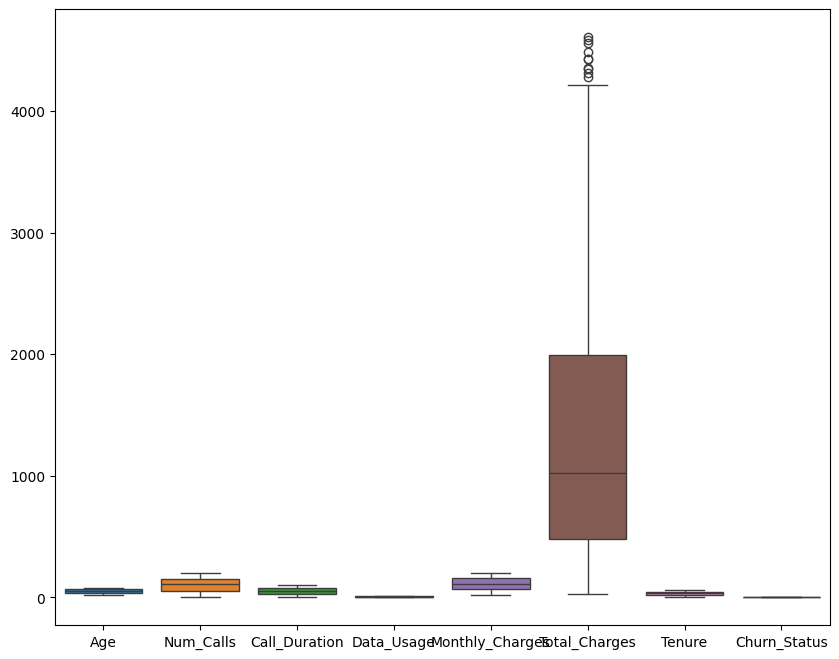

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Plot the boxplot
sns.boxplot(data=data)

# Show the plot
plt.show()


RemoVe Outliers

In [47]:
for x in ['Total_Charges']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [49]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Encode 'Location' column
data['Location'] = label_encoder.fit_transform(data['Location'])

In [40]:
data.head()

,Age,Gender,Location,Num_Calls,Call_Duration,Data_Usage,Monthly_Charges,Total_Charges,Tenure,Churn_Status
0,56,1,0,24,39.457608,0.053135,27.251393,136.256967,51,1
1,69,1,2,193,42.182818,8.044946,92.976109,2231.426605,28,0
2,46,0,0,24,41.102108,7.728096,112.930994,2371.550871,31,0
3,32,1,2,53,90.761100,5.484192,124.516141,2241.290532,11,1
4,60,1,0,32,71.403264,0.664633,188.468705,2827.030570,23,0


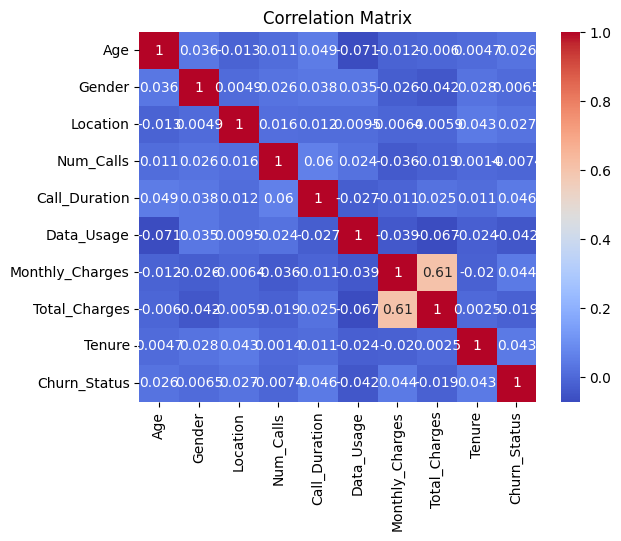

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [52]:
data.head().T

,0,1,2,3,4
Age,56.000000,69.000000,46.000000,32.000000,60.000000
Gender,1.000000,1.000000,0.000000,1.000000,1.000000
Location,0.000000,2.000000,0.000000,2.000000,0.000000
Num_Calls,24.000000,193.000000,24.000000,53.000000,32.000000
Call_Duration,39.457608,42.182818,41.102108,90.761100,71.403264
Data_Usage,0.053135,8.044946,7.728096,5.484192,0.664633
Monthly_Charges,27.251393,92.976109,112.930994,124.516141,188.468705
Total_Charges,136.256967,2231.426605,2371.550871,2241.290532,2827.030570
Tenure,51.000000,28.000000,31.000000,11.000000,23.000000
Churn_Status,1.000000,0.000000,0.000000,1.000000,0.000000


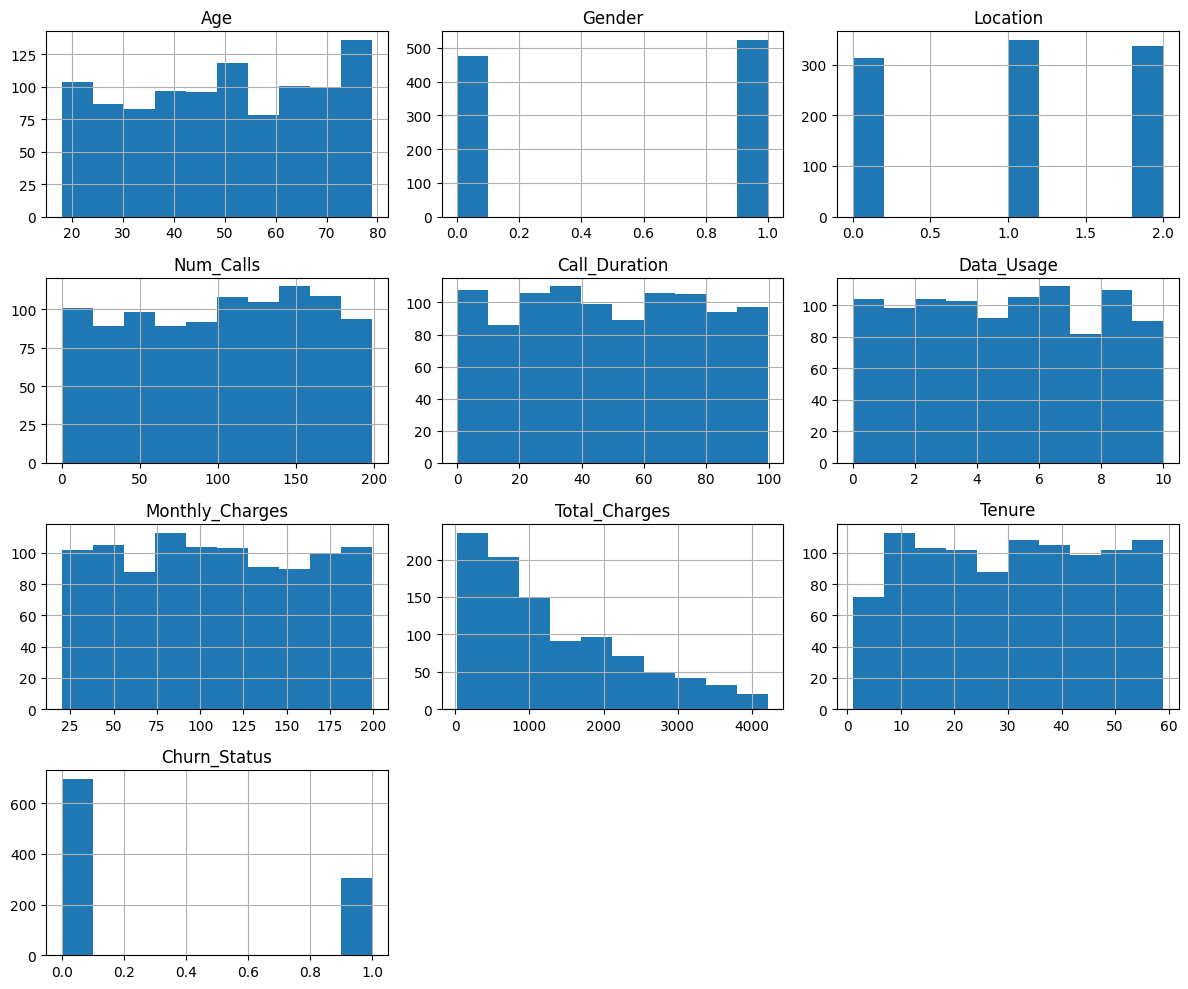

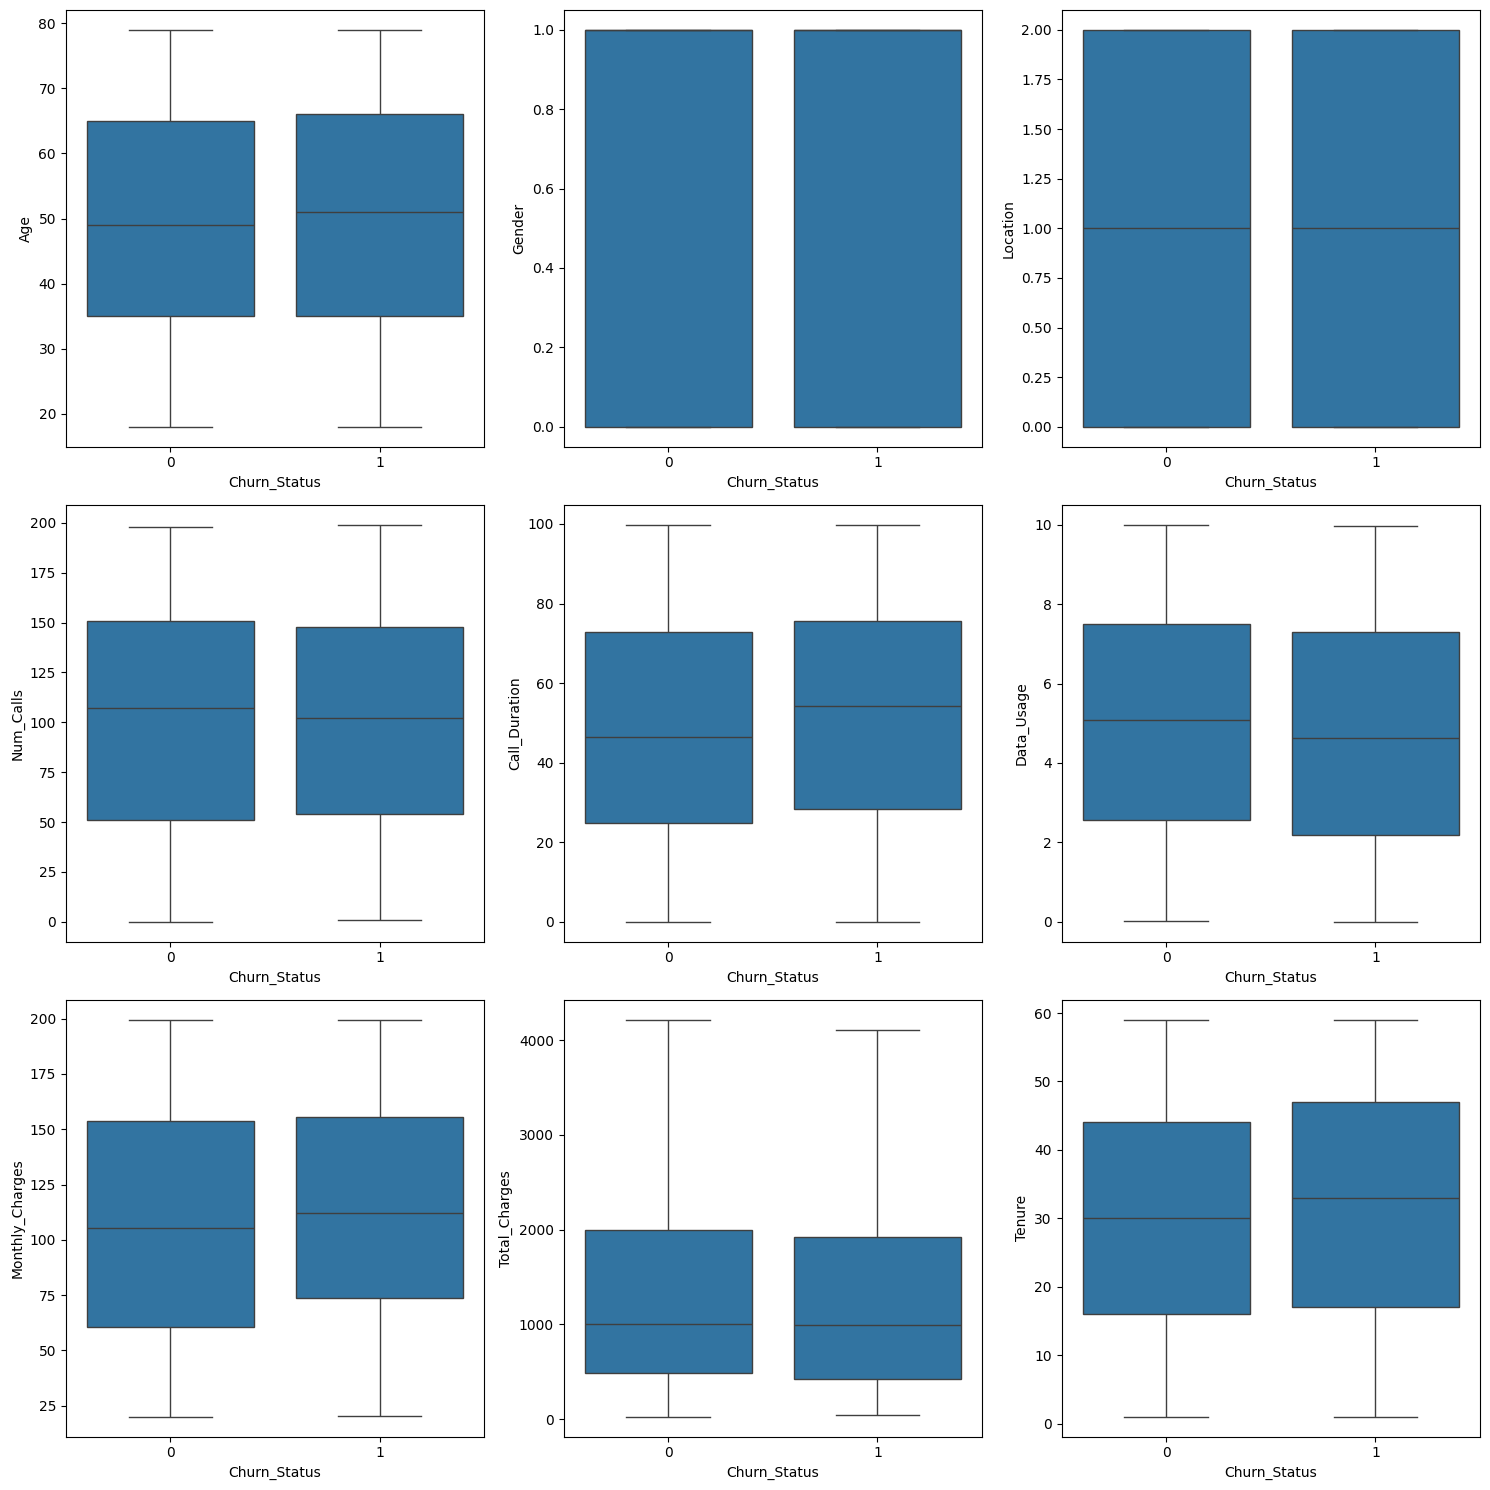

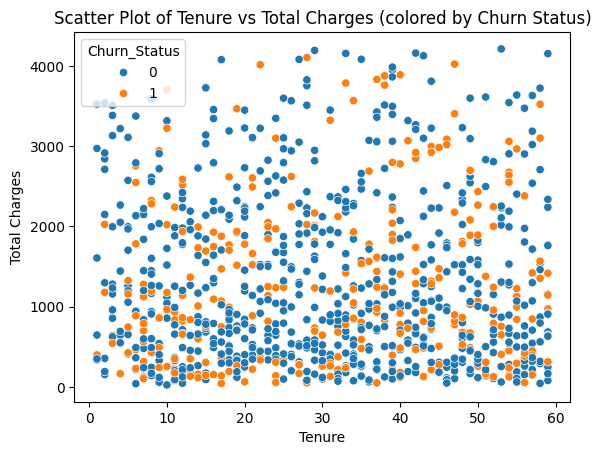

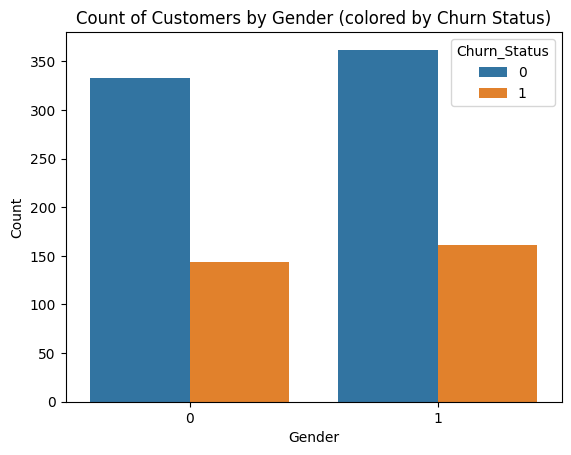

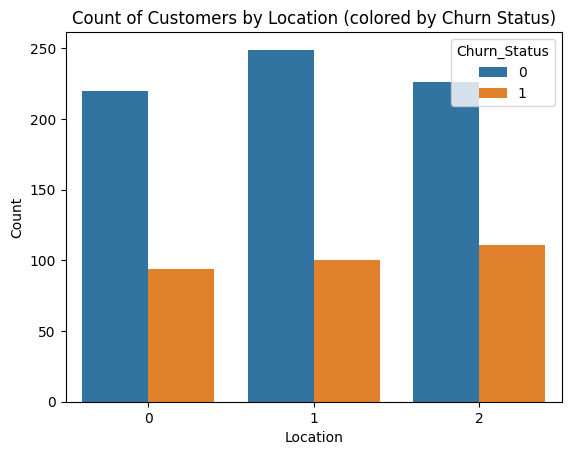

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing your dataset

# Histograms of numerical features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots of numerical features by Churn_Status
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, column in enumerate(data.columns[:-1]):  # Exclude 'Churn_Status'
    sns.boxplot(x='Churn_Status', y=column, data=data, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

# Scatter plot of 'Tenure' vs 'Total_Charges' colored by Churn_Status
sns.scatterplot(x='Tenure', y='Total_Charges', hue='Churn_Status', data=data)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Tenure vs Total Charges (colored by Churn Status)')
plt.show()

# Bar plot of categorical features
categorical_features = ['Gender', 'Location']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Churn_Status', data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Customers by {feature} (colored by Churn Status)')
    plt.show()


Statistical summary

In [9]:
categoricals = ['Gender','Location'	]
numericals = ['Age','Gender','Location','Num_Calls','Call_Duration','Data_Usage','Monthly_Charges','Total_Charges','Tenure','Churn_Status']

In [10]:
data[numericals].describe()

,Age,Num_Calls,Call_Duration,Data_Usage,Monthly_Charges,Total_Charges,Tenure,Churn_Status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,101.659000,49.466126,4.951193,109.100151,1334.422786,30.728000,0.305000
std,18.114267,57.484913,28.824227,2.869670,51.848438,1063.684093,16.573554,0.460638
min,18.000000,0.000000,0.001163,0.000307,20.040867,24.320908,1.000000,0.000000
25%,35.000000,51.750000,25.843554,2.458431,64.095321,478.596292,17.000000,0.000000
50%,50.000000,106.000000,48.826282,4.954748,107.057056,1020.498624,31.000000,0.000000
75%,66.000000,150.000000,73.789309,7.417944,154.831650,1994.868976,45.000000,1.000000
max,79.000000,199.000000,99.782086,9.995577,199.450895,4607.536187,59.000000,1.000000


In [11]:
data[categoricals].describe().T

,count,unique,top,freq
Gender,1000,2,Male,523
Location,1000,3,Suburban,349


#  Create a new feature for average monthly usage

In [63]:

data['Avg_Monthly_Usage'] = data['Num_Calls'] * data['Call_Duration'] + data['Data_Usage']


# Calculate the average data usage

In [62]:

average_data_usage = data['Data_Usage'].mean()

# Set the threshold to be 1 standard deviation above the average
threshold = average_data_usage + data['Data_Usage'].std()

# Create a binary indicator for high data usage using the threshold
data['High_Data_Usage'] = (data['Data_Usage'] > threshold).astype(int)

In [60]:
# Example: Interaction between 'Num_Calls' and 'Call_Duration'
data['Call_Intensity'] = data['Num_Calls'] * data['Call_Duration']

In [64]:
data.head()

,Age,Gender,Location,Num_Calls,Call_Duration,Data_Usage,Monthly_Charges,Total_Charges,Tenure,Churn_Status,Call_Intensity,High_Data_Usage,Avg_Monthly_Usage
0,56,1,0,24,39.457608,0.053135,27.251393,136.256967,51,1,946.982581,0,947.035716
1,69,1,2,193,42.182818,8.044946,92.976109,2231.426605,28,0,8141.283846,1,8149.328792
2,46,0,0,24,41.102108,7.728096,112.930994,2371.550871,31,0,986.450581,0,994.178676
3,32,1,2,53,90.761100,5.484192,124.516141,2241.290532,11,1,4810.338314,0,4815.822505
4,60,1,0,32,71.403264,0.664633,188.468705,2827.030570,23,0,2284.904462,0,2285.569096


In [68]:
data.isnull().sum()

Age                   0
Gender                0
Location              0
Num_Calls             0
Call_Duration         0
Data_Usage            0
Monthly_Charges       0
Total_Charges        10
Tenure                0
Churn_Status          0
Call_Intensity        0
High_Data_Usage       0
Avg_Monthly_Usage     0
dtype: int64

In [91]:
data['Total_Charges'].fillna(int(data['Total_Charges'].mean()),inplace=True)

In [69]:
data.dropna(subset=['Total_Charges'], inplace=True)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate each model's accuracy on the testing set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")

c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  Accuracy: 0.6616
Decision Tree:
  Accuracy: 0.5455
Random Forest:
  Accuracy: 0.6465
Gradient Boosting:
  Accuracy: 0.6162


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize classification algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Perform cross-validation and calculate accuracy for each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Logistic Regression:
  Mean Accuracy: 0.6929 (+/- 0.0076)
Decision Tree:
  Mean Accuracy: 0.5707 (+/- 0.0306)
Random Forest:
  Mean Accuracy: 0.6717 (+/- 0.0221)
Gradient Boosting:
  Mean Accuracy: 0.6586 (+/- 0.0412)


In [83]:
from sklearn.metrics import confusion_matrix

# Initialize classification algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Iterate over each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels for the test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the confusion matrix
    print(f"Confusion matrix for {name}:")
    print(cm)


c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix for Logistic Regression:
[[131   0]
 [ 67   0]]
Confusion matrix for Decision Tree:
[[84 47]
 [45 22]]
Confusion matrix for Random Forest:
[[125   6]
 [ 67   0]]
Confusion matrix for Gradient Boosting:
[[117  14]
 [ 66   1]]


c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


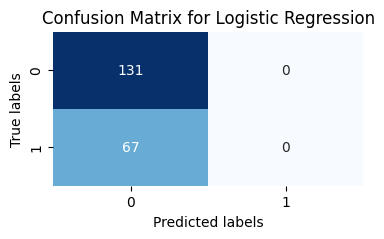

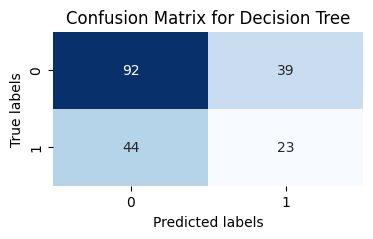

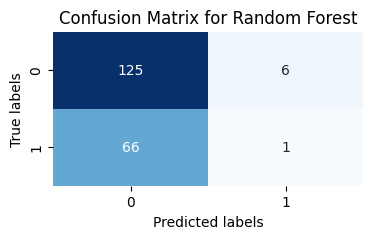

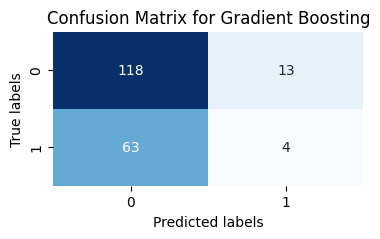

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize classification algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Iterate over each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels for the test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best logistic regression model
best_logistic_regression = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy on Test Set: 0.6616


c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

# Define hyperparameters grid

# Feature importance

In [89]:
 #Fit the logistic regression model
best_logistic_regression.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = best_logistic_regression.coef_[0]

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance:
Data_Usage: -0.0175
Call_Intensity: 0.0088
Avg_Monthly_Usage: -0.0087
Num_Calls: -0.0062
Call_Duration: -0.0059
Age: -0.0049
Tenure: 0.0030
Monthly_Charges: 0.0019
High_Data_Usage: -0.0011
Location: -0.0007
Gender: -0.0006
Total_Charges: -0.0002


c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\SAMIK\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


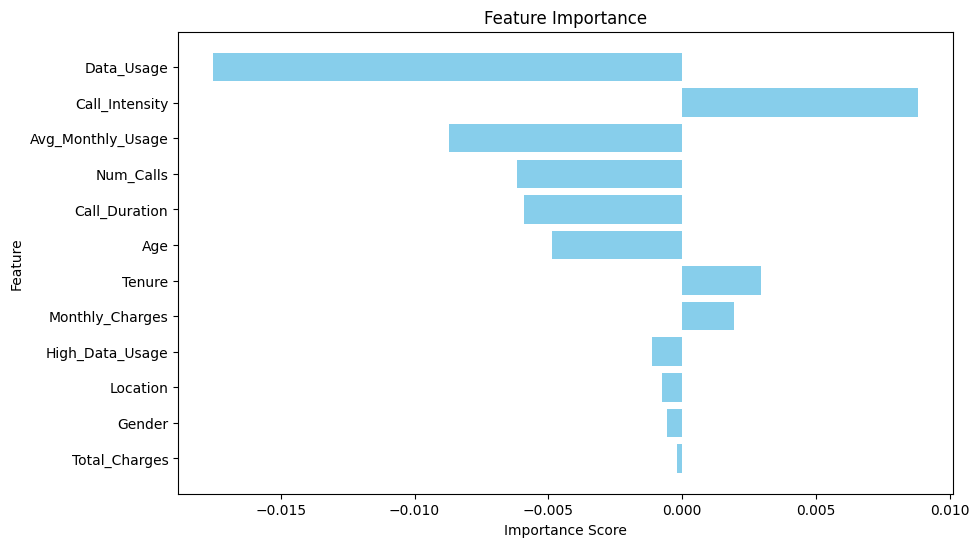

In [90]:
import matplotlib.pyplot as plt

# Fit the logistic regression model
best_logistic_regression.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance = best_logistic_regression.coef_[0]

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and importance scores
features, importance_scores = zip(*sorted_feature_importance)

# Plot feature importance using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()